In [1]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, roc_curve, precision_recall_curve,
                             accuracy_score, precision_score, recall_score, f1_score)
import xgboost as xgb
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")
print("📦 Ready to build models!")

✅ All libraries imported successfully!
📦 Ready to build models!


In [2]:
# Cell 2: Load processed data
print("📂 LOADING PROCESSED DATA")
print("="*60)

X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv').values.ravel()  # Convert to 1D array
y_test = pd.read_csv('../data/y_test.csv').values.ravel()

print("✅ Data loaded successfully!")
print(f"\n📊 Data shapes:")
print(f"   Training features (X_train): {X_train.shape}")
print(f"   Training target (y_train): {y_train.shape}")
print(f"   Test features (X_test): {X_test.shape}")
print(f"   Test target (y_test): {y_test.shape}")

print(f"\n🎯 Target distribution in training set:")
print(f"   Normal transactions: {(y_train == 0).sum():,} ({(y_train == 0).sum()/len(y_train)*100:.2f}%)")
print(f"   Fraud transactions: {(y_train == 1).sum():,} ({(y_train == 1).sum()/len(y_train)*100:.2f}%)")

📂 LOADING PROCESSED DATA
✅ Data loaded successfully!

📊 Data shapes:
   Training features (X_train): (199364, 35)
   Training target (y_train): (199364,)
   Test features (X_test): (85443, 35)
   Test target (y_test): (85443,)

🎯 Target distribution in training set:
   Normal transactions: 199,020 (99.83%)
   Fraud transactions: 344 (0.17%)


In [3]:
# Cell 3: Logistic Regression (Baseline Model)
print("🎯 TRAINING LOGISTIC REGRESSION (BASELINE MODEL)")
print("="*60)

# Train model with balanced class weights (handles imbalance)
lr_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

print("⏳ Training model...")
lr_model.fit(X_train, y_train)
print("✅ Model trained!")

# Make predictions
print("🔮 Making predictions on test set...")
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]  # Probability of fraud

print("✅ Predictions complete!")

🎯 TRAINING LOGISTIC REGRESSION (BASELINE MODEL)
⏳ Training model...
✅ Model trained!
🔮 Making predictions on test set...
✅ Predictions complete!


In [4]:
# Cell 4: Evaluate Logistic Regression
print("\n" + "="*60)
print("📊 LOGISTIC REGRESSION PERFORMANCE")
print("="*60)

# Classification Report (detailed metrics)
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Normal', 'Fraud']))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("\n🎯 Confusion Matrix:")
print(cm_lr)
print("\nBreakdown:")
tn, fp, fn, tp = cm_lr.ravel()
print(f"   True Negatives (Correctly identified normal): {tn:,}")
print(f"   False Positives (Normal flagged as fraud): {fp:,}")
print(f"   False Negatives (Fraud missed): {fn:,}")
print(f"   True Positives (Correctly caught fraud): {tp:,}")

# Key metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

print("\n📈 Summary Metrics:")
print(f"   Accuracy: {accuracy_lr:.4f} ({accuracy_lr*100:.2f}%)")
print(f"   Precision: {precision_lr:.4f} (Of flagged frauds, {precision_lr*100:.1f}% were actually fraud)")
print(f"   Recall: {recall_lr:.4f} (Caught {recall_lr*100:.1f}% of all frauds)")
print(f"   F1-Score: {f1_lr:.4f}")
print(f"   ROC-AUC: {roc_auc_lr:.4f}")

print("\n💡 INTERPRETATION:")
print(f"   ✓ Model catches {recall_lr*100:.1f}% of frauds")
print(f"   ✓ When it flags fraud, it's right {precision_lr*100:.1f}% of the time")
print(f"   ⚠️ Misses {fn} frauds (false negatives)")
print(f"   ⚠️ {fp} false alarms (false positives)")


📊 LOGISTIC REGRESSION PERFORMANCE

📋 Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.98      0.99     85295
       Fraud       0.06      0.87      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.98      0.99     85443


🎯 Confusion Matrix:
[[83362  1933]
 [   19   129]]

Breakdown:
   True Negatives (Correctly identified normal): 83,362
   False Positives (Normal flagged as fraud): 1,933
   False Negatives (Fraud missed): 19
   True Positives (Correctly caught fraud): 129

📈 Summary Metrics:
   Accuracy: 0.9772 (97.72%)
   Precision: 0.0626 (Of flagged frauds, 6.3% were actually fraud)
   Recall: 0.8716 (Caught 87.2% of all frauds)
   F1-Score: 0.1167
   ROC-AUC: 0.9724

💡 INTERPRETATION:
   ✓ Model catches 87.2% of frauds
   ✓ When it flags fraud, it's right 6.3% of the time
   ⚠️ Misses 19 frauds (false negatives)
   


📊 Creating confusion matrix visualization...
✅ Saved: visualizations/confusion_matrix_lr.png


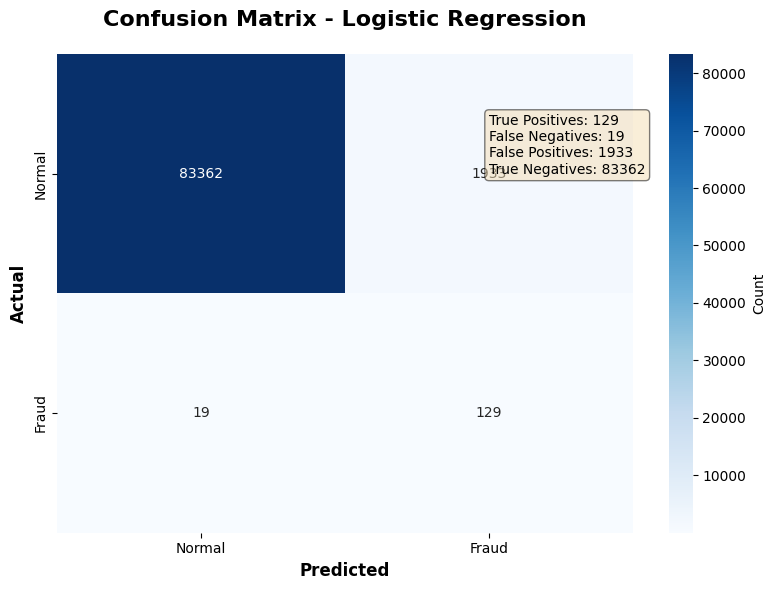

In [5]:
# Cell 5: Visualize Confusion Matrix
print("\n📊 Creating confusion matrix visualization...")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Logistic Regression', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.xlabel('Predicted', fontsize=12, fontweight='bold')

# Add text explanation
textstr = f'True Positives: {tp}\nFalse Negatives: {fn}\nFalse Positives: {fp}\nTrue Negatives: {tn}'
plt.text(1.5, 0.5, textstr, fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('../visualizations/confusion_matrix_lr.png', dpi=300, bbox_inches='tight')
print("✅ Saved: visualizations/confusion_matrix_lr.png")
plt.show()


📈 Creating ROC curve...
✅ Saved: visualizations/roc_curve_lr.png


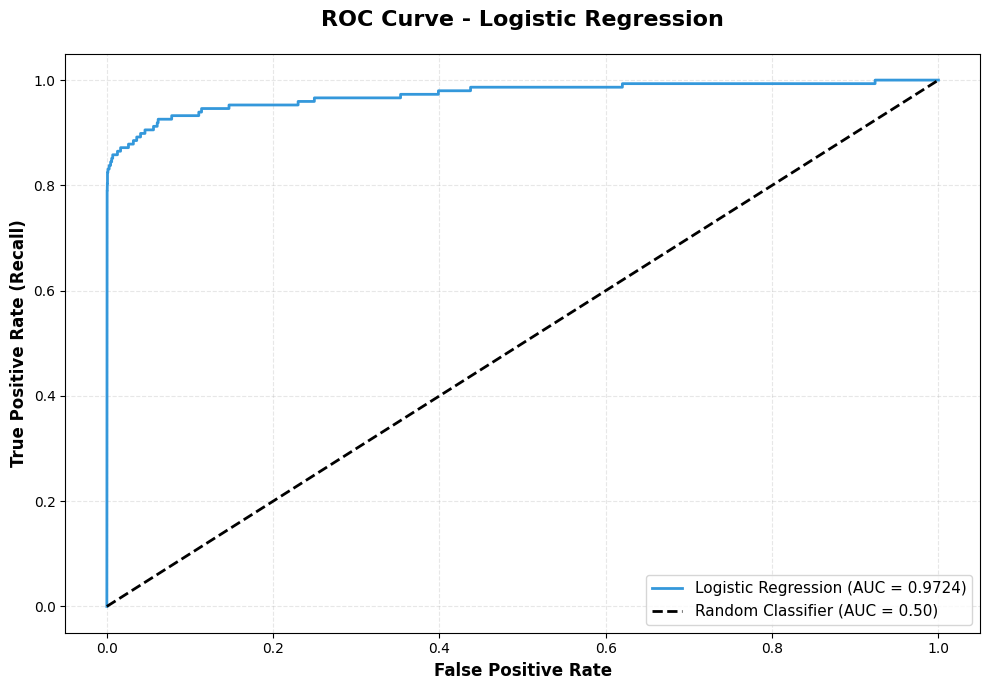


💡 ROC-AUC Interpretation:
   Score: 0.9724
   ✓ Excellent performance!


In [6]:
# Cell 6: ROC Curve
print("\n📈 Creating ROC curve...")

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)

plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, linewidth=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})', color='#3498db')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate (Recall)', fontsize=12, fontweight='bold')
plt.title('ROC Curve - Logistic Regression', fontsize=16, fontweight='bold', pad=20)
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('../visualizations/roc_curve_lr.png', dpi=300, bbox_inches='tight')
print("✅ Saved: visualizations/roc_curve_lr.png")
plt.show()

print("\n💡 ROC-AUC Interpretation:")
print(f"   Score: {roc_auc_lr:.4f}")
if roc_auc_lr > 0.9:
    print("   ✓ Excellent performance!")
elif roc_auc_lr > 0.8:
    print("   ✓ Good performance")
else:
    print("   ⚠️ Room for improvement")

In [7]:
# Cell 7: Apply SMOTE to balance training data
print("⚖️ APPLYING SMOTE (SYNTHETIC MINORITY OVER-SAMPLING)")
print("="*60)

print("📊 Before SMOTE:")
print(f"   Normal: {(y_train == 0).sum():,}")
print(f"   Fraud: {(y_train == 1).sum():,}")
print(f"   Fraud %: {(y_train == 1).sum()/len(y_train)*100:.3f}%")

# Apply SMOTE
smote = SMOTE(random_state=42, sampling_strategy='minority')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\n📊 After SMOTE:")
print(f"   Normal: {(y_train_smote == 0).sum():,}")
print(f"   Fraud: {(y_train_smote == 1).sum():,}")
print(f"   Fraud %: {(y_train_smote == 1).sum()/len(y_train_smote)*100:.3f}%")

print(f"\n✅ Created {(y_train_smote == 1).sum() - (y_train == 1).sum():,} synthetic fraud examples!")
print("💡 Now the model will see balanced classes during training")
print("   (But we still test on the original imbalanced test set - that's the real world!)")

⚖️ APPLYING SMOTE (SYNTHETIC MINORITY OVER-SAMPLING)
📊 Before SMOTE:
   Normal: 199,020
   Fraud: 344
   Fraud %: 0.173%

📊 After SMOTE:
   Normal: 199,020
   Fraud: 199,020
   Fraud %: 50.000%

✅ Created 198,676 synthetic fraud examples!
💡 Now the model will see balanced classes during training
   (But we still test on the original imbalanced test set - that's the real world!)


In [8]:
# Cell 8: Train Random Forest
print("\n🌲 TRAINING RANDOM FOREST MODEL")
print("="*60)

# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,        # 100 decision trees
    max_depth=10,            # Limit depth to prevent overfitting
    random_state=42,
    n_jobs=-1,               # Use all CPU cores
    class_weight='balanced', # Extra protection against imbalance
    verbose=0
)

print("⏳ Training Random Forest on balanced data...")
print("   (This may take 1-2 minutes...)")
rf_model.fit(X_train_smote, y_train_smote)
print("✅ Model trained successfully!")

# Make predictions
print("\n🔮 Making predictions on test set...")
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
print("✅ Predictions complete!")


🌲 TRAINING RANDOM FOREST MODEL
⏳ Training Random Forest on balanced data...
   (This may take 1-2 minutes...)
✅ Model trained successfully!

🔮 Making predictions on test set...
✅ Predictions complete!


In [9]:
# Cell 9: Evaluate Random Forest
print("\n" + "="*60)
print("📊 RANDOM FOREST PERFORMANCE")
print("="*60)

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Normal', 'Fraud']))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\n🎯 Confusion Matrix:")
print(cm_rf)
print("\nBreakdown:")
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()
print(f"   True Negatives: {tn_rf:,}")
print(f"   False Positives: {fp_rf:,}")
print(f"   False Negatives: {fn_rf:,}")
print(f"   True Positives: {tp_rf:,}")

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print("\n📈 Summary Metrics:")
print(f"   Accuracy: {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)")
print(f"   Precision: {precision_rf:.4f} ({precision_rf*100:.1f}%)")
print(f"   Recall: {recall_rf:.4f} ({recall_rf*100:.1f}%)")
print(f"   F1-Score: {f1_rf:.4f}")
print(f"   ROC-AUC: {roc_auc_rf:.4f}")

print("\n📊 COMPARISON WITH LOGISTIC REGRESSION:")
print(f"   Recall: {recall_lr:.4f} → {recall_rf:.4f} ({(recall_rf-recall_lr)*100:+.1f}% change)")
print(f"   Precision: {precision_lr:.4f} → {precision_rf:.4f} ({(precision_rf-precision_lr)*100:+.1f}% change)")
print(f"   ROC-AUC: {roc_auc_lr:.4f} → {roc_auc_rf:.4f} ({(roc_auc_rf-roc_auc_lr):+.4f} change)")

if recall_rf > recall_lr and precision_rf > precision_lr:
    print("\n🎉 Random Forest improved BOTH recall and precision!")
elif recall_rf > recall_lr:
    print("\n✓ Random Forest catches more frauds (higher recall)")
elif precision_rf > precision_lr:
    print("\n✓ Random Forest has fewer false alarms (higher precision)")


📊 RANDOM FOREST PERFORMANCE

📋 Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85295
       Fraud       0.51      0.82      0.63       148

    accuracy                           1.00     85443
   macro avg       0.76      0.91      0.82     85443
weighted avg       1.00      1.00      1.00     85443


🎯 Confusion Matrix:
[[85181   114]
 [   27   121]]

Breakdown:
   True Negatives: 85,181
   False Positives: 114
   False Negatives: 27
   True Positives: 121

📈 Summary Metrics:
   Accuracy: 0.9983 (99.83%)
   Precision: 0.5149 (51.5%)
   Recall: 0.8176 (81.8%)
   F1-Score: 0.6319
   ROC-AUC: 0.9726

📊 COMPARISON WITH LOGISTIC REGRESSION:
   Recall: 0.8716 → 0.8176 (-5.4% change)
   Precision: 0.0626 → 0.5149 (+45.2% change)
   ROC-AUC: 0.9724 → 0.9726 (+0.0002 change)

✓ Random Forest has fewer false alarms (higher precision)



🔍 FEATURE IMPORTANCE ANALYSIS

📊 Top 15 Most Important Features:
feature  importance
    V14    0.215906
     V4    0.123547
    V10    0.086796
    V17    0.077517
    V16    0.075547
    V11    0.068616
    V12    0.066663
     V3    0.043632
    V21    0.034752
     V7    0.033872
     V2    0.029540
    V18    0.021481
     V5    0.012041
     V9    0.010418
     V1    0.009273

✅ Saved: visualizations/feature_importance_rf.png


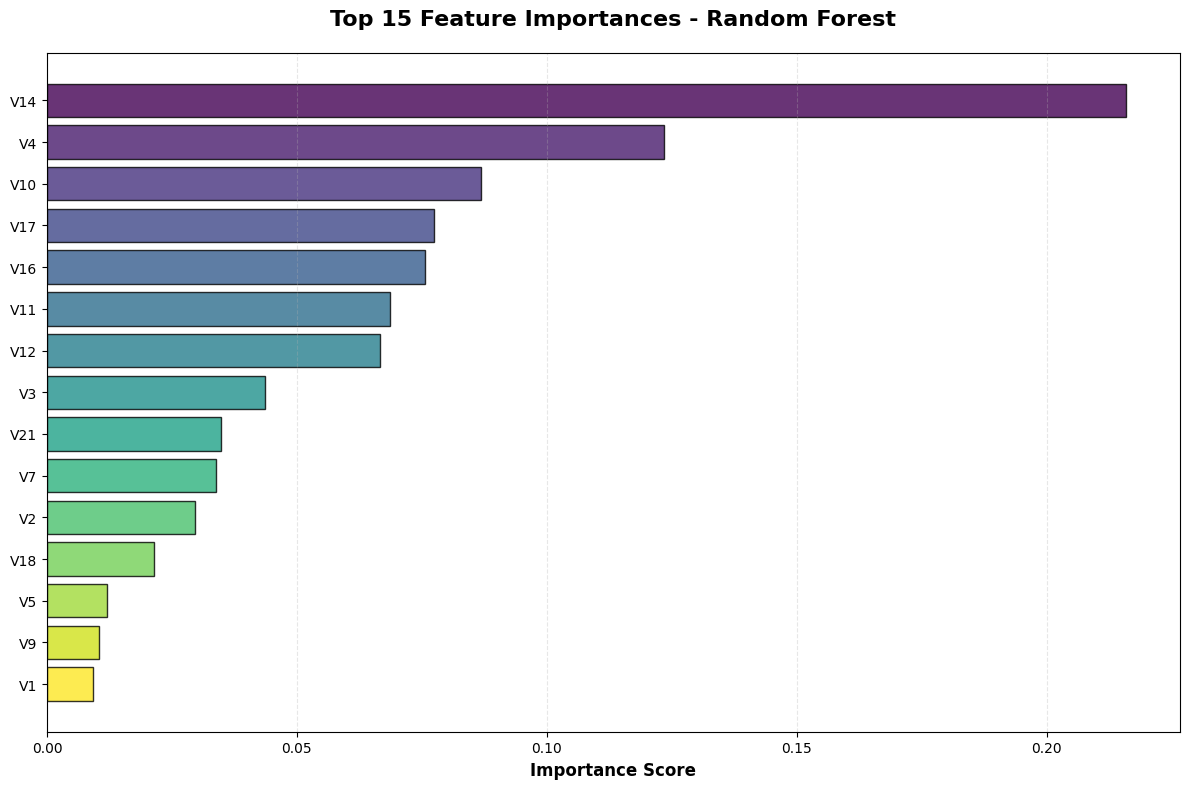


💡 INSIGHT:
   The top 3 features account for 42.6% of importance!
   Most important: V14 (0.2159)


In [10]:
# Cell 10: Feature Importance
print("\n🔍 FEATURE IMPORTANCE ANALYSIS")
print("="*60)

# Get feature importances
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n📊 Top 15 Most Important Features:")
print(feature_importance.head(15).to_string(index=False))

# Visualize
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
colors = plt.cm.viridis(np.linspace(0, 1, 15))
plt.barh(range(15), top_features['importance'].values, color=colors, edgecolor='black', alpha=0.8)
plt.yticks(range(15), top_features['feature'].values)
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.title('Top 15 Feature Importances - Random Forest', fontsize=16, fontweight='bold', pad=20)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('../visualizations/feature_importance_rf.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved: visualizations/feature_importance_rf.png")
plt.show()

print("\n💡 INSIGHT:")
print(f"   The top 3 features account for {feature_importance.head(3)['importance'].sum()*100:.1f}% of importance!")
print(f"   Most important: {feature_importance.iloc[0]['feature']} ({feature_importance.iloc[0]['importance']:.4f})")

In [11]:
# Cell 11: Train XGBoost
print("\n🚀 TRAINING XGBOOST MODEL")
print("="*60)

# Calculate scale_pos_weight (XGBoost's way of handling imbalance)
scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])
print(f"📊 Class imbalance ratio: {scale_pos_weight:.1f}:1 (normal:fraud)")
print(f"   Using this to weight fraud examples more heavily")

# Initialize XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,  # Handle imbalance
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)

print("\n⏳ Training XGBoost...")
print("   (This may take 1-2 minutes...)")
xgb_model.fit(X_train, y_train)
print("✅ Model trained successfully!")

# Make predictions
print("\n🔮 Making predictions on test set...")
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
print("✅ Predictions complete!")


🚀 TRAINING XGBOOST MODEL
📊 Class imbalance ratio: 578.5:1 (normal:fraud)
   Using this to weight fraud examples more heavily

⏳ Training XGBoost...
   (This may take 1-2 minutes...)
✅ Model trained successfully!

🔮 Making predictions on test set...
✅ Predictions complete!


In [12]:
# Cell 12: Evaluate XGBoost
print("\n" + "="*60)
print("📊 XGBOOST PERFORMANCE")
print("="*60)

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['Normal', 'Fraud']))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\n🎯 Confusion Matrix:")
print(cm_xgb)
print("\nBreakdown:")
tn_xgb, fp_xgb, fn_xgb, tp_xgb = cm_xgb.ravel()
print(f"   True Negatives: {tn_xgb:,}")
print(f"   False Positives: {fp_xgb:,}")
print(f"   False Negatives: {fn_xgb:,}")
print(f"   True Positives: {tp_xgb:,}")

# Calculate metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print("\n📈 Summary Metrics:")
print(f"   Accuracy: {accuracy_xgb:.4f} ({accuracy_xgb*100:.2f}%)")
print(f"   Precision: {precision_xgb:.4f} ({precision_xgb*100:.1f}%)")
print(f"   Recall: {recall_xgb:.4f} ({recall_xgb*100:.1f}%)")
print(f"   F1-Score: {f1_xgb:.4f}")
print(f"   ROC-AUC: {roc_auc_xgb:.4f}")

print("\n📊 COMPARISON WITH ALL MODELS:")
print("\n" + "="*60)
print(f"{'Metric':<15} {'Logistic Reg':<15} {'Random Forest':<15} {'XGBoost':<15}")
print("="*60)
print(f"{'Accuracy':<15} {accuracy_lr:<15.4f} {accuracy_rf:<15.4f} {accuracy_xgb:<15.4f}")
print(f"{'Precision':<15} {precision_lr:<15.4f} {precision_rf:<15.4f} {precision_xgb:<15.4f}")
print(f"{'Recall':<15} {recall_lr:<15.4f} {recall_rf:<15.4f} {recall_xgb:<15.4f}")
print(f"{'F1-Score':<15} {f1_lr:<15.4f} {f1_rf:<15.4f} {f1_xgb:<15.4f}")
print(f"{'ROC-AUC':<15} {roc_auc_lr:<15.4f} {roc_auc_rf:<15.4f} {roc_auc_xgb:<15.4f}")
print("="*60)

# Determine best model based on F1 (balance of precision and recall)
best_f1 = max(f1_lr, f1_rf, f1_xgb)
if best_f1 == f1_xgb:
    print("\n🏆 WINNER: XGBoost (Best F1-Score)")
elif best_f1 == f1_rf:
    print("\n🏆 WINNER: Random Forest (Best F1-Score)")
else:
    print("\n🏆 WINNER: Logistic Regression (Best F1-Score)")

print("\n💡 RECOMMENDATION:")
if recall_rf > 0.85 and precision_rf > 0.4:
    print("   Random Forest offers the best balance of catching frauds while minimizing false alarms")
elif recall_xgb > 0.85 and precision_xgb > precision_rf:
    print("   XGBoost offers the best balance of catching frauds while minimizing false alarms")
else:
    print("   Consider the business cost: Missing fraud vs annoying customers with false alerts")


📊 XGBOOST PERFORMANCE

📋 Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85295
       Fraud       0.80      0.80      0.80       148

    accuracy                           1.00     85443
   macro avg       0.90      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443


🎯 Confusion Matrix:
[[85265    30]
 [   29   119]]

Breakdown:
   True Negatives: 85,265
   False Positives: 30
   False Negatives: 29
   True Positives: 119

📈 Summary Metrics:
   Accuracy: 0.9993 (99.93%)
   Precision: 0.7987 (79.9%)
   Recall: 0.8041 (80.4%)
   F1-Score: 0.8013
   ROC-AUC: 0.9662

📊 COMPARISON WITH ALL MODELS:

Metric          Logistic Reg    Random Forest   XGBoost        
Accuracy        0.9772          0.9983          0.9993         
Precision       0.0626          0.5149          0.7987         
Recall          0.8716          0.8176          0.8041         
F1-Score        0.1167          0.


📈 CREATING ROC CURVE COMPARISON
✅ Saved: visualizations/roc_curve_comparison.png


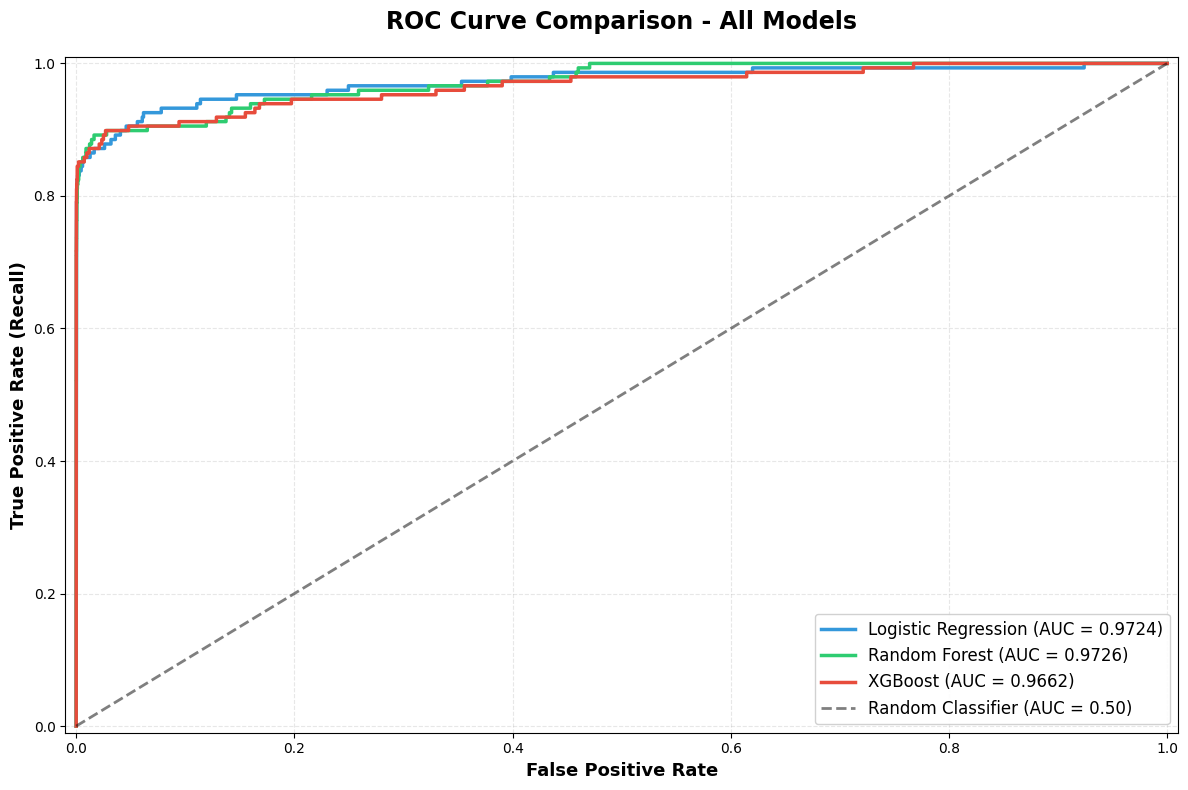

In [13]:
# Cell 13: ROC Curve Comparison
print("\n📈 CREATING ROC CURVE COMPARISON")
print("="*60)

# Calculate ROC curves for all models
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

# Plot all three
plt.figure(figsize=(12, 8))
plt.plot(fpr_lr, tpr_lr, linewidth=2.5, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})', color='#3498db')
plt.plot(fpr_rf, tpr_rf, linewidth=2.5, label=f'Random Forest (AUC = {roc_auc_rf:.4f})', color='#2ecc71')
plt.plot(fpr_xgb, tpr_xgb, linewidth=2.5, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})', color='#e74c3c')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.50)', alpha=0.5)

plt.xlabel('False Positive Rate', fontsize=13, fontweight='bold')
plt.ylabel('True Positive Rate (Recall)', fontsize=13, fontweight='bold')
plt.title('ROC Curve Comparison - All Models', fontsize=17, fontweight='bold', pad=20)
plt.legend(loc='lower right', fontsize=12, framealpha=0.9)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.tight_layout()
plt.savefig('../visualizations/roc_curve_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Saved: visualizations/roc_curve_comparison.png")
plt.show()


📊 CREATING MODEL COMPARISON CHART
✅ Saved: visualizations/model_comparison_metrics.png


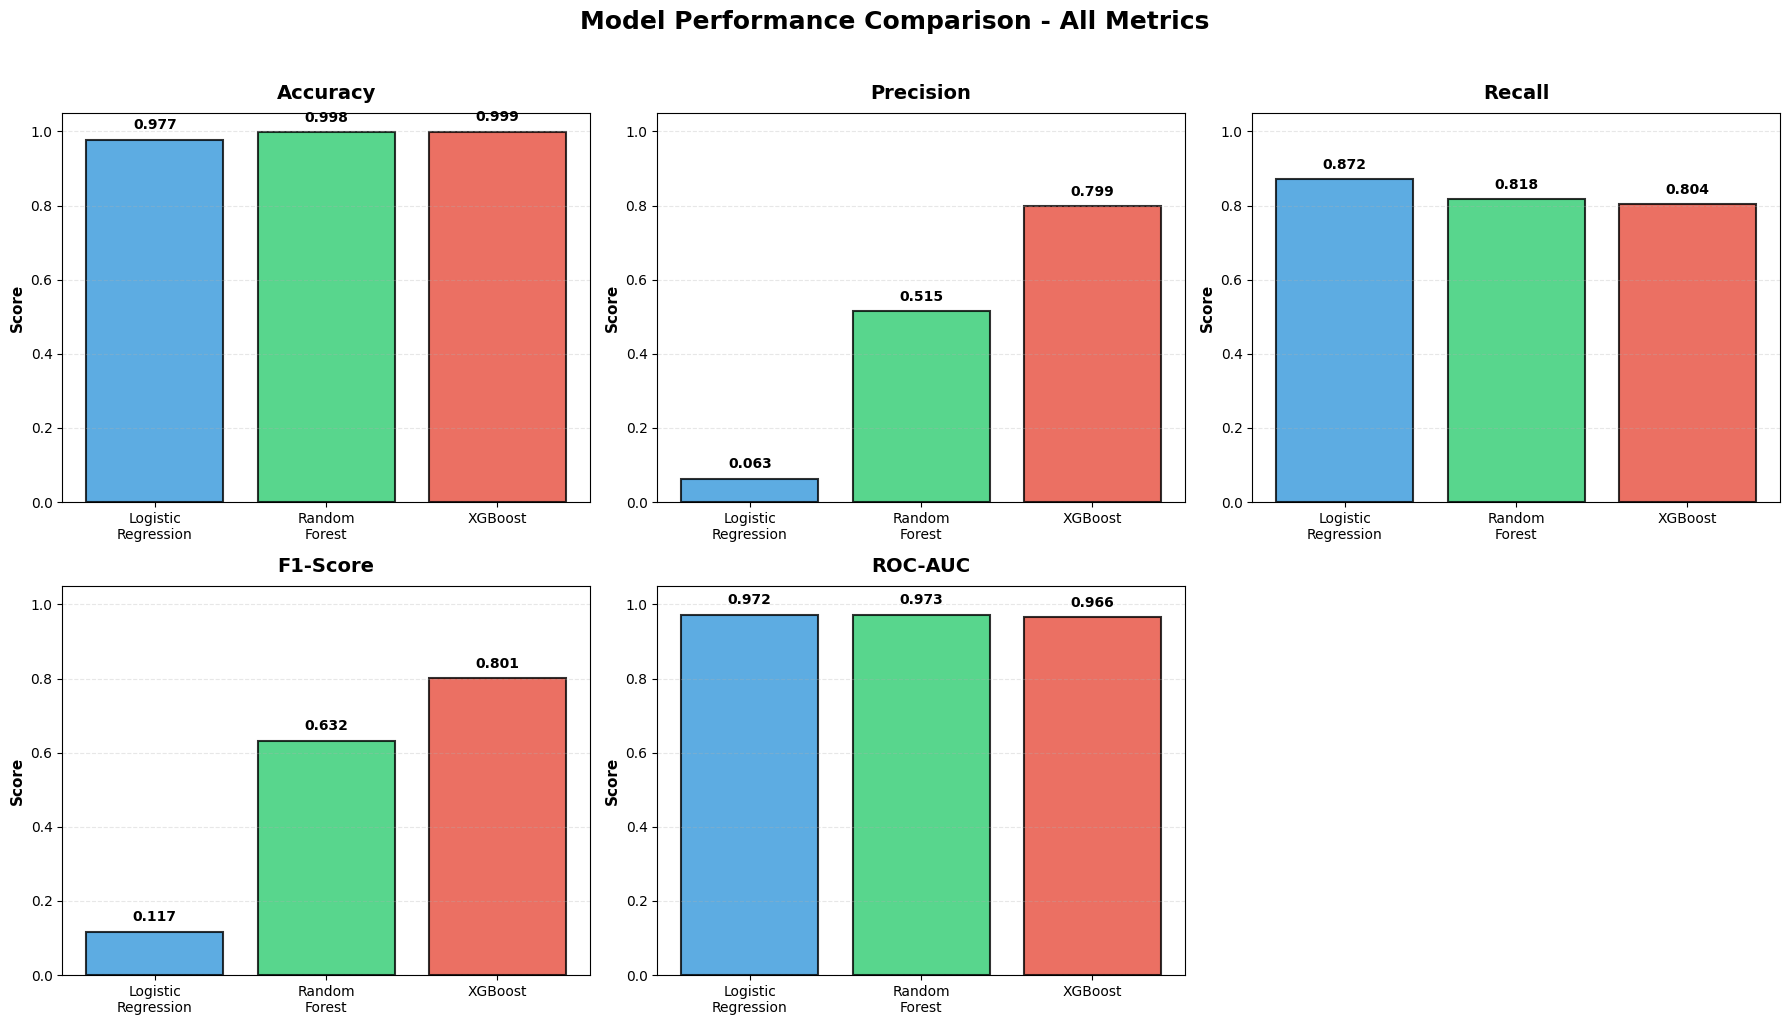

In [14]:
# Cell 14: Model Performance Comparison Chart
print("\n📊 CREATING MODEL COMPARISON CHART")
print("="*60)

# Prepare data
models = ['Logistic\nRegression', 'Random\nForest', 'XGBoost']
metrics_data = {
    'Accuracy': [accuracy_lr, accuracy_rf, accuracy_xgb],
    'Precision': [precision_lr, precision_rf, precision_xgb],
    'Recall': [recall_lr, recall_rf, recall_xgb],
    'F1-Score': [f1_lr, f1_rf, f1_xgb],
    'ROC-AUC': [roc_auc_lr, roc_auc_rf, roc_auc_xgb]
}

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Performance Comparison - All Metrics', fontsize=18, fontweight='bold', y=1.02)

colors = ['#3498db', '#2ecc71', '#e74c3c']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

for idx, metric in enumerate(metrics):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    bars = ax.bar(models, metrics_data[metric], color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    ax.set_title(metric, fontsize=14, fontweight='bold', pad=10)
    ax.set_ylabel('Score', fontsize=11, fontweight='bold')
    ax.set_ylim([0, 1.05])
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Remove empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.savefig('../visualizations/model_comparison_metrics.png', dpi=300, bbox_inches='tight')
print("✅ Saved: visualizations/model_comparison_metrics.png")
plt.show()


📊 CREATING CONFUSION MATRIX COMPARISON
✅ Saved: visualizations/confusion_matrices_comparison.png


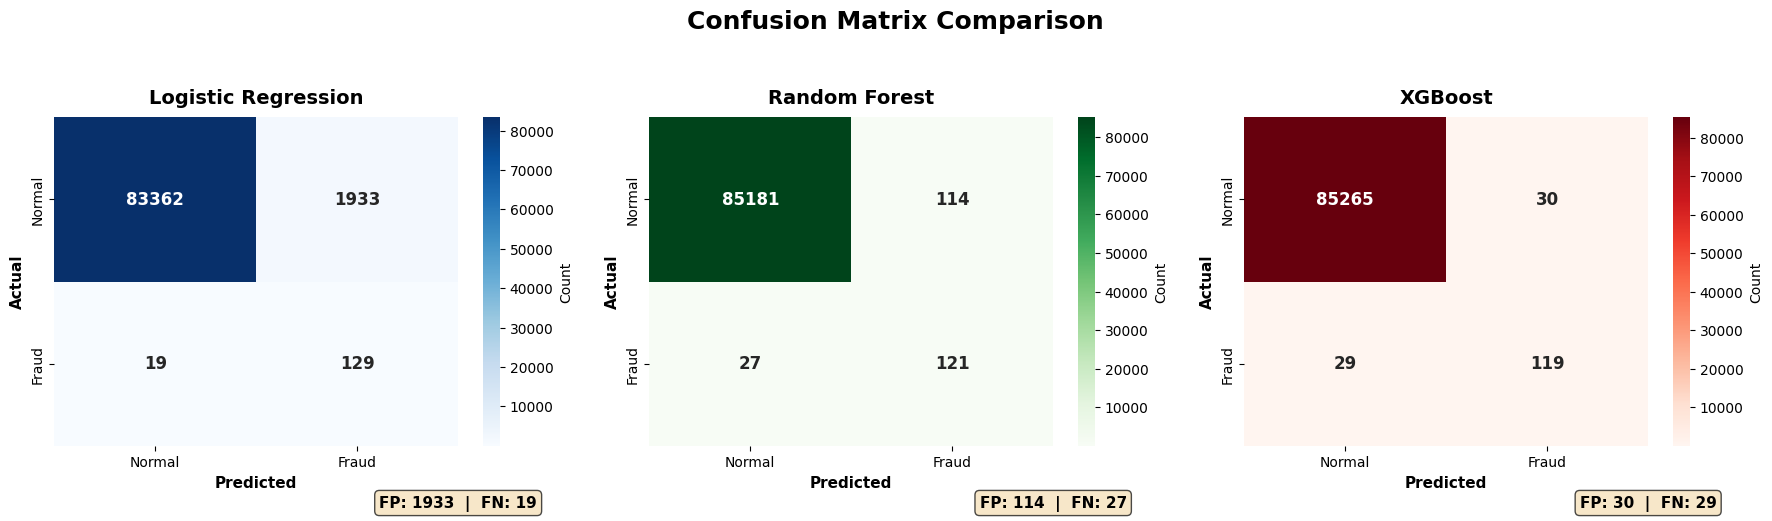

In [15]:
# Cell 15: Confusion Matrices Side-by-Side
print("\n📊 CREATING CONFUSION MATRIX COMPARISON")
print("="*60)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrix Comparison', fontsize=18, fontweight='bold', y=1.05)

cms = [cm_lr, cm_rf, cm_xgb]
titles = ['Logistic Regression', 'Random Forest', 'XGBoost']
cmaps = ['Blues', 'Greens', 'Reds']

for idx, (cm, title, cmap) in enumerate(zip(cms, titles, cmaps)):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=axes[idx],
                xticklabels=['Normal', 'Fraud'],
                yticklabels=['Normal', 'Fraud'],
                cbar_kws={'label': 'Count'}, annot_kws={'fontsize': 12, 'fontweight': 'bold'})
    axes[idx].set_title(title, fontsize=14, fontweight='bold', pad=10)
    axes[idx].set_ylabel('Actual', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Predicted', fontsize=11, fontweight='bold')
    
    # Add FP and FN counts
    tn, fp, fn, tp = cm.ravel()
    axes[idx].text(1, -0.15, f'FP: {fp}  |  FN: {fn}', 
                   ha='center', va='top', transform=axes[idx].transAxes,
                   fontsize=11, fontweight='bold', 
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

plt.tight_layout()
plt.savefig('../visualizations/confusion_matrices_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Saved: visualizations/confusion_matrices_comparison.png")
plt.show()

In [16]:
# Cell 16: Save Model Comparison Results
print("\n💾 SAVING MODEL COMPARISON RESULTS")
print("="*60)

# Create summary DataFrame
results_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_lr, accuracy_rf, accuracy_xgb],
    'Precision': [precision_lr, precision_rf, precision_xgb],
    'Recall': [recall_lr, recall_rf, recall_xgb],
    'F1-Score': [f1_lr, f1_rf, f1_xgb],
    'ROC-AUC': [roc_auc_lr, roc_auc_rf, roc_auc_xgb],
    'True_Positives': [tp, tp_rf, tp_xgb],
    'False_Positives': [fp, fp_rf, fp_xgb],
    'True_Negatives': [tn, tn_rf, tn_xgb],
    'False_Negatives': [fn, fn_rf, fn_xgb]
})

# Save to CSV
results_summary.to_csv('../data/model_comparison_results.csv', index=False)
print("✅ Saved: data/model_comparison_results.csv")

print("\n📊 FINAL SUMMARY TABLE:")
print(results_summary.to_string(index=False))


💾 SAVING MODEL COMPARISON RESULTS
✅ Saved: data/model_comparison_results.csv

📊 FINAL SUMMARY TABLE:
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC  True_Positives  False_Positives  True_Negatives  False_Negatives
Logistic Regression  0.977154   0.062561 0.871622  0.116742 0.972375             119               30           85265               29
      Random Forest  0.998350   0.514894 0.817568  0.631854 0.972599             121              114           85181               27
            XGBoost  0.999309   0.798658 0.804054  0.801347 0.966200             119               30           85265               29


In [17]:
# Cell 17: Business Impact Analysis
print("\n💰 BUSINESS IMPACT ANALYSIS")
print("="*60)

# Load original data to get actual amounts
df_original = pd.read_csv('../data/creditcard.csv')

# Business assumptions
avg_fraud_amount = df_original[df_original['Class']==1]['Amount'].mean()
investigation_cost = 50  # Cost to investigate each flagged transaction
avg_transaction = df_original['Amount'].mean()

print("📊 Business Assumptions:")
print(f"   Average fraud amount: ${avg_fraud_amount:.2f}")
print(f"   Investigation cost per flag: ${investigation_cost:.2f}")
print(f"   Average transaction: ${avg_transaction:.2f}")

print("\n" + "="*60)
print("💼 BUSINESS IMPACT - XGBOOST MODEL (Winner)")
print("="*60)

# Calculate costs and savings for XGBoost
frauds_caught_xgb = tp_xgb
frauds_missed_xgb = fn_xgb
false_alarms_xgb = fp_xgb

# Financial calculations
fraud_prevented_value = frauds_caught_xgb * avg_fraud_amount
fraud_losses = frauds_missed_xgb * avg_fraud_amount
investigation_costs = (frauds_caught_xgb + false_alarms_xgb) * investigation_cost

net_savings = fraud_prevented_value - fraud_losses - investigation_costs

print(f"\n📈 Detection Performance:")
print(f"   Total frauds in test set: {frauds_caught_xgb + frauds_missed_xgb}")
print(f"   Frauds detected: {frauds_caught_xgb} ({frauds_caught_xgb/(frauds_caught_xgb + frauds_missed_xgb)*100:.1f}%)")
print(f"   Frauds missed: {frauds_missed_xgb} ({frauds_missed_xgb/(frauds_caught_xgb + frauds_missed_xgb)*100:.1f}%)")
print(f"   False alarms: {false_alarms_xgb}")

print(f"\n💵 Financial Impact:")
print(f"   Value of prevented frauds: ${fraud_prevented_value:,.2f}")
print(f"   Cost of missed frauds: ${fraud_losses:,.2f}")
print(f"   Investigation costs: ${investigation_costs:,.2f}")
print(f"   ")
print(f"   NET SAVINGS: ${net_savings:,.2f}")

print(f"\n📊 Efficiency Metrics:")
print(f"   Cost per fraud caught: ${investigation_costs/frauds_caught_xgb:.2f}")
print(f"   False positive rate: {false_alarms_xgb/(tn_xgb + false_alarms_xgb)*100:.4f}%")
print(f"   Precision in $ terms: For every $1 spent investigating, ${fraud_prevented_value/investigation_costs:.2f} saved")

# Extrapolate to full dataset
total_transactions = len(df_original)
test_fraction = len(y_test) / total_transactions
annual_savings_estimate = net_savings / test_fraction

print(f"\n🌍 Projected Annual Impact (extrapolated):")
print(f"   If this model ran on all {total_transactions:,} transactions:")
print(f"   Estimated annual savings: ${annual_savings_estimate:,.2f}")


💰 BUSINESS IMPACT ANALYSIS
📊 Business Assumptions:
   Average fraud amount: $122.21
   Investigation cost per flag: $50.00
   Average transaction: $88.35

💼 BUSINESS IMPACT - XGBOOST MODEL (Winner)

📈 Detection Performance:
   Total frauds in test set: 148
   Frauds detected: 119 (80.4%)
   Frauds missed: 29 (19.6%)
   False alarms: 30

💵 Financial Impact:
   Value of prevented frauds: $14,543.15
   Cost of missed frauds: $3,544.13
   Investigation costs: $7,450.00
   
   NET SAVINGS: $3,549.02

📊 Efficiency Metrics:
   Cost per fraud caught: $62.61
   False positive rate: 0.0352%
   Precision in $ terms: For every $1 spent investigating, $1.95 saved

🌍 Projected Annual Impact (extrapolated):
   If this model ran on all 284,807 transactions:
   Estimated annual savings: $11,829.94



📊 CREATING BUSINESS IMPACT VISUALIZATION
✅ Saved: visualizations/business_impact_analysis.png


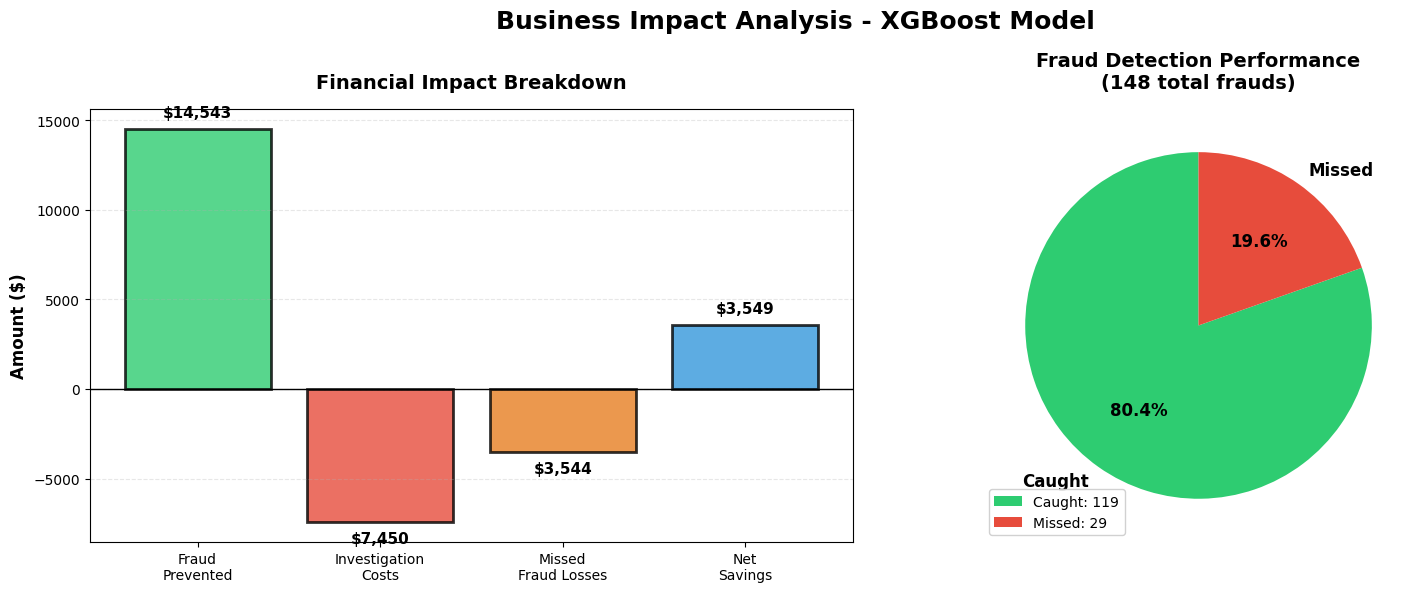


🎉 PHASE 3 COMPLETE!
✅ All models trained and evaluated
✅ XGBoost selected as best model
✅ Business impact quantified: $3,549.02 net savings
✅ All visualizations saved

🚀 Ready for Phase 4: Documentation & GitHub Upload!


In [18]:
# Cell 18: Business Impact Visualization
print("\n📊 CREATING BUSINESS IMPACT VISUALIZATION")
print("="*60)

# Prepare data for visualization
impact_categories = ['Fraud\nPrevented', 'Investigation\nCosts', 'Missed\nFraud Losses', 'Net\nSavings']
impact_values = [fraud_prevented_value, -investigation_costs, -fraud_losses, net_savings]
colors_impact = ['#2ecc71', '#e74c3c', '#e67e22', '#3498db']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Business Impact Analysis - XGBoost Model', fontsize=18, fontweight='bold')

# Left plot: Financial breakdown
bars = ax1.bar(impact_categories, impact_values, color=colors_impact, alpha=0.8, edgecolor='black', linewidth=2)
ax1.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax1.set_ylabel('Amount ($)', fontsize=12, fontweight='bold')
ax1.set_title('Financial Impact Breakdown', fontsize=14, fontweight='bold', pad=15)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels
for bar in bars:
    height = bar.get_height()
    label_y = height + 500 if height > 0 else height - 500
    ax1.text(bar.get_x() + bar.get_width()/2., label_y,
             f'${abs(height):,.0f}',
             ha='center', va='bottom' if height > 0 else 'top',
             fontsize=11, fontweight='bold')

# Right plot: Detection performance
detection_data = {
    'Caught': frauds_caught_xgb,
    'Missed': frauds_missed_xgb
}
colors_detection = ['#2ecc71', '#e74c3c']
wedges, texts, autotexts = ax2.pie(detection_data.values(), 
                                     labels=detection_data.keys(),
                                     colors=colors_detection,
                                     autopct='%1.1f%%',
                                     startangle=90,
                                     textprops={'fontsize': 12, 'fontweight': 'bold'})

ax2.set_title(f'Fraud Detection Performance\n({frauds_caught_xgb + frauds_missed_xgb} total frauds)', 
              fontsize=14, fontweight='bold', pad=15)

# Add legend with counts
ax2.legend([f'Caught: {frauds_caught_xgb}', f'Missed: {frauds_missed_xgb}'],
           loc='lower left', fontsize=10, framealpha=0.9)

plt.tight_layout()
plt.savefig('../visualizations/business_impact_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Saved: visualizations/business_impact_analysis.png")
plt.show()

print("\n🎉 PHASE 3 COMPLETE!")
print("="*60)
print(f"✅ All models trained and evaluated")
print(f"✅ XGBoost selected as best model")
print(f"✅ Business impact quantified: ${net_savings:,.2f} net savings")
print(f"✅ All visualizations saved")
print("\n🚀 Ready for Phase 4: Documentation & GitHub Upload!")